## ML Project: Face to BMI Prediction by Fine-tuning the VGG16 Pre-trained Image Model

#### Mariam Adeyemo

#### Install and Import the necessary libraries 

In [1]:
#!pip install --upgrade pip

ERROR: To modify pip, please run the following command:
C:\Users\dammy\anaconda3\python.exe -m pip install --upgrade pip


  Using cached pip-23.1.2-py3-none-any.whl (2.1 MB)


In [2]:
#pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
import matplotlib.pyplot as plt

#### Load the csv file and do some EDA

In [2]:
# Load and split the dataset into train and test
bmi_df = pd.read_csv('data.csv')

bmi_df.head()

,Unnamed: 0,bmi,gender,is_training,name
0,0,34.207396,Male,1,img_0.bmp
1,1,26.453720,Male,1,img_1.bmp
2,2,34.967561,Female,1,img_2.bmp
3,3,22.044766,Female,1,img_3.bmp
4,4,37.758789,Female,1,img_4.bmp


In [3]:
bmi_df['gender'].value_counts()

Male      2438
Female    1768
Name: gender, dtype: int64

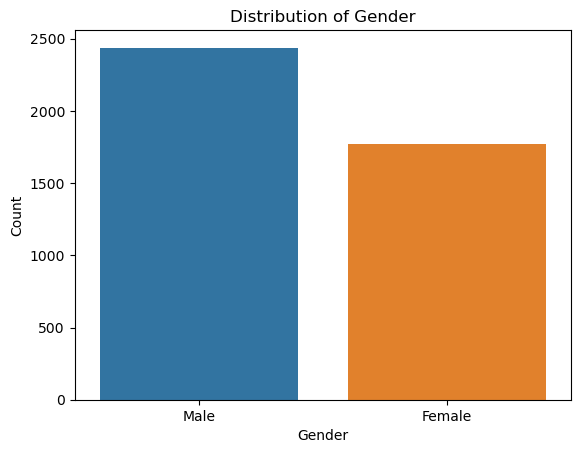

In [4]:
#plot the frequency of the gender
sns.countplot(data=bmi_df, x='gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender')
plt.show()

In [5]:
bmi_df['is_training'].value_counts()

1    3368
0     838
Name: is_training, dtype: int64

In [6]:
bmi_df['bmi'].describe()

count    4206.000000
mean       32.796210
std         8.299130
min        17.716216
25%        26.541837
50%        31.323409
75%        37.577261
max        85.987061
Name: bmi, dtype: float64

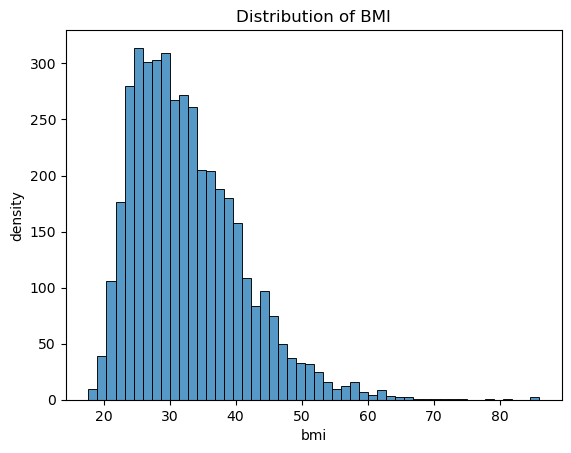

In [7]:
# plot the distribution of the BMI
sns.histplot(data=bmi_df, x='bmi')
plt.xlabel('bmi')
plt.ylabel('density')
plt.title('Distribution of BMI')
plt.show()

In [8]:
bmi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4206 entries, 0 to 4205
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   4206 non-null   int64  
 1   bmi          4206 non-null   float64
 2   gender       4206 non-null   object 
 3   is_training  4206 non-null   int64  
 4   name         4206 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 164.4+ KB


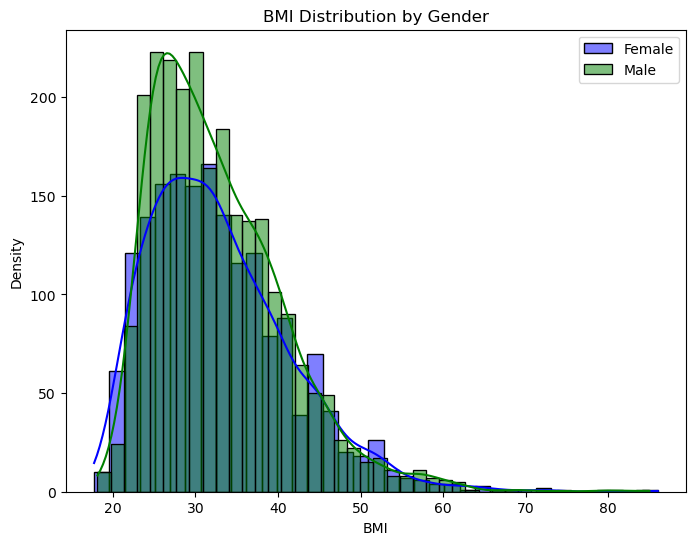

In [9]:
# Filter the DataFrame for females and males
female_data = bmi_df[bmi_df['gender'] == 'Female']
male_data = bmi_df[bmi_df['gender'] == 'Male']

# Set up the plot
plt.figure(figsize=(8, 6))

# Plot distribution for females with density line
sns.histplot(data=female_data, x='bmi', label='Female', color='blue', kde=True)

# Plot distribution for males with density line
sns.histplot(data=male_data, x='bmi', label='Male', color='green', kde=True)

plt.xlabel('BMI')
plt.ylabel('Density')
plt.title('BMI Distribution by Gender')
plt.legend()  # Show legend indicating the gender

plt.show()

#### Split the data into train and test set based on the column "is_training"

In [10]:
#split the dataset into train and test
train_data = bmi_df[bmi_df['is_training'] == 1]
test_data = bmi_df[bmi_df['is_training'] == 0]

print('The shape of the train_data: ', train_data.shape)
print('The shape of the test_data: ', test_data.shape)

The shape of the train_data:  (3368, 5)
The shape of the test_data:  (838, 5)


### Image Loading, Preprocessing, and Augumentation 

#### Use the "ImageDataGenerator()" class from keras.processing.image to build out an instance called "train_datagen" with the following parameters:
* shear_range = 0.2
* zoom_range = 0.2
* horizontal_flip = True

#### Then build the training, validation, and test set by using the method ".flow_from_dataframe()"

- dataframe: The Pandas dataframe containing the data.
- directory: The directory where the images are stored.
- x_col: The name of the column in the dataframe that contains the filenames of the images.
- y_col: The name of the column in the dataframe that contains the labels/targets.
- target_size: (224, 224)
- batch_size = 8
- class_mode = raw (Include target data)

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create the ImageDataGenerator for the train_data
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    validation_split=0.2
)

# Create the ImageDataGenerator for the test_data
test_datagen = ImageDataGenerator(
    rescale = 1./255,
)

image_width, image_height = 224, 224
batch_size = 8

# Load the train data with target data
train_set = train_datagen.flow_from_dataframe(
    train_data,
    directory= r'C:\Users\dammy\Google Drive\MyUChicago\Courses\Spring 2023\Machine Learning\Assignment\Project\BMI-20230313T174553Z-001\BMI\Data\Images',
    x_col='name',
    y_col='bmi',
    target_size=(image_width, image_height),
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='raw',
    subset='training'
)

# Load the validation data with target data
validation_set = train_datagen.flow_from_dataframe(
    train_data,
    directory= r'C:\Users\dammy\Google Drive\MyUChicago\Courses\Spring 2023\Machine Learning\Assignment\Project\BMI-20230313T174553Z-001\BMI\Data\Images',
    x_col='name',
    y_col='bmi',
    target_size=(image_width, image_height),
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='raw',
    subset='validation'
)

# Load the test data with target data
test_set = test_datagen.flow_from_dataframe(
    test_data,
    directory= r'C:\Users\dammy\Google Drive\MyUChicago\Courses\Spring 2023\Machine Learning\Assignment\Project\BMI-20230313T174553Z-001\BMI\Data\Images',
    x_col='name',
    y_col='bmi',
    target_size=(image_width, image_height),
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='raw'
)

Found 2568 validated image filenames.
Found 642 validated image filenames.


C:\Users\dammy\anaconda3\lib\site-packages\keras\preprocessing\image.py:1137: UserWarning: Found 158 invalid image filename(s) in x_col="name". These filename(s) will be ignored.
  warnings.warn(


Found 752 validated image filenames.


C:\Users\dammy\anaconda3\lib\site-packages\keras\preprocessing\image.py:1137: UserWarning: Found 86 invalid image filename(s) in x_col="name". These filename(s) will be ignored.
  warnings.warn(


In [12]:
print("Image Shape of each Training Instance:", train_set.image_shape)
print("Image Shape of each Test Instance:", test_set.image_shape)
print("Image Shape of each Validation Instance:", validation_set.image_shape)

Image Shape of each Training Instance: (224, 224, 3)
Image Shape of each Test Instance: (224, 224, 3)
Image Shape of each Validation Instance: (224, 224, 3)


### Feature extraction: Instantiating and freezing the VGG16 convolutional base

Defining and training the densely connected regressor

In [10]:
from keras.applications.vgg16 import VGG16
from tensorflow import keras
from tensorflow.keras import layers

# Load the pre-trained VGG16 model, excluding the top layer
VGG16_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add new output layers to the pre-trained model
x = VGG16_model.output
x = layers.Flatten()(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)
predictions = layers.Dense(1, activation='linear')(x)
model = keras.Model(inputs=VGG16_model.input, outputs=predictions)

# Freeze the weights of all layers except the new output layers
for layer in VGG16_model.layers:
    layer.trainable = False

# Define a custom learning rate
learning_rate = 0.001

# Compile the model with a custom learning rate
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='mean_absolute_error', metrics=['mean_absolute_error'])

# Add learning rate scheduling
lr_scheduler = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=1e-5)

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_model.h5",
        save_best_only=True,
        monitor="val_loss"
    ),
    keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=5,
        restore_best_weights=True
    ),
    lr_scheduler
]

# Train the model
history = model.fit(train_set, epochs=10, validation_data=validation_set, callbacks=callbacks)

Epoch 1/10
321/321 [==============================] - 701s 2s/step - loss: 7.9701 - mean_absolute_error: 7.9701 - val_loss: 9.3625 - val_mean_absolute_error: 9.3625 - lr: 0.0010
Epoch 2/10
321/321 [==============================] - 662s 2s/step - loss: 7.5100 - mean_absolute_error: 7.5100 - val_loss: 5.4472 - val_mean_absolute_error: 5.4472 - lr: 0.0010
Epoch 3/10
321/321 [==============================] - 663s 2s/step - loss: 7.2194 - mean_absolute_error: 7.2194 - val_loss: 5.4979 - val_mean_absolute_error: 5.4979 - lr: 0.0010
Epoch 4/10
321/321 [==============================] - 663s 2s/step - loss: 7.0408 - mean_absolute_error: 7.0408 - val_loss: 5.2183 - val_mean_absolute_error: 5.2183 - lr: 0.0010
Epoch 5/10
321/321 [==============================] - 660s 2s/step - loss: 6.8643 - mean_absolute_error: 6.8643 - val_loss: 5.3004 - val_mean_absolute_error: 5.3004 - lr: 0.0010
Epoch 6/10
321/321 [==============================] - 670s 2s/step - loss: 6.7763 - mean_absolute_error: 6.776

In [13]:
VGG16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

#### Plotting the feature extraction VGG16 train and test loss results

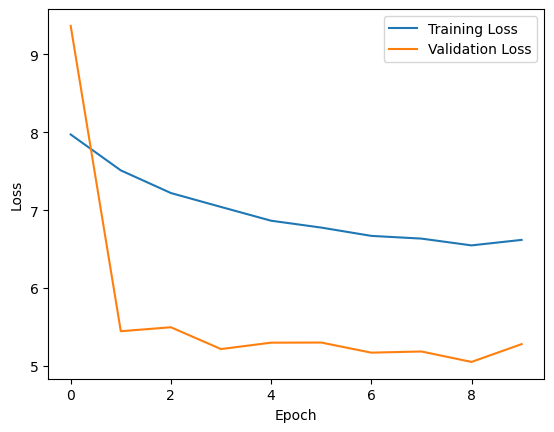

In [11]:
import matplotlib.pyplot as plt

# Get training and validation loss values from history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the training and validation loss values
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Evaluating the feature extraction VGG16 model on the test set

In [12]:
#load the model
test_model = keras.models.load_model(
    "feature_extraction_model.h5")

# Evaluate the model on the test set
test_loss, test_mae = test_model.evaluate(test_set)

# Print the test MAE
print(f'Test MAE: {test_mae:.3f}')

94/94 [==============================] - 137s 1s/step - loss: 5.8162 - mean_absolute_error: 5.8162
Test MAE: 5.816


### Fine tuning the VGG16by  freezing all layers until the fourth from the last

In [14]:
VGG16_model.trainable = True
for layer in VGG16_model.layers[:-4]:
    layer.trainable = False

In [15]:
VGG16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

#### Fine tuning the VGG16 model by using learning rate scheduling

In [16]:
# Define a custom learning rate
learning_rate = 0.001

# Compile the model with a custom learning rate
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='mean_absolute_error', metrics=['mean_absolute_error'])

# Add learning rate scheduling
lr_scheduler = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=1e-5)

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning_model.h5",
        save_best_only=True,
        monitor="val_loss"
    ),
    keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=10,
        restore_best_weights=True
    ),
    lr_scheduler
]

history = model.fit(train_set, epochs=30, validation_data=validation_set, callbacks=callbacks) 

Epoch 1/30
321/321 [==============================] - 781s 2s/step - loss: 12.1312 - mean_absolute_error: 12.1312 - val_loss: 6.1917 - val_mean_absolute_error: 6.1917 - lr: 0.0010
Epoch 2/30
321/321 [==============================] - 776s 2s/step - loss: 9.6566 - mean_absolute_error: 9.6566 - val_loss: 7.4494 - val_mean_absolute_error: 7.4494 - lr: 0.0010
Epoch 3/30
321/321 [==============================] - 771s 2s/step - loss: 8.1337 - mean_absolute_error: 8.1337 - val_loss: 5.6944 - val_mean_absolute_error: 5.6944 - lr: 0.0010
Epoch 4/30
321/321 [==============================] - 781s 2s/step - loss: 7.4643 - mean_absolute_error: 7.4643 - val_loss: 6.1742 - val_mean_absolute_error: 6.1742 - lr: 0.0010
Epoch 5/30
321/321 [==============================] - 770s 2s/step - loss: 7.2581 - mean_absolute_error: 7.2581 - val_loss: 5.4360 - val_mean_absolute_error: 5.4360 - lr: 0.0010
Epoch 6/30
321/321 [==============================] - 765s 2s/step - loss: 6.8069 - mean_absolute_error: 6.8

#### Plotting the fine-tuned VGG16 train and test loss results

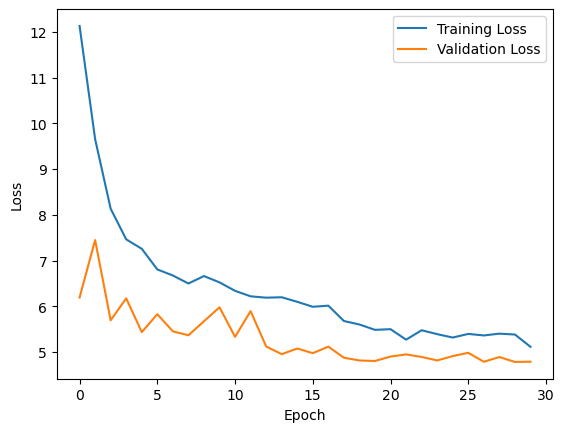

In [17]:
import matplotlib.pyplot as plt

# Get training and validation loss values from history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the training and validation loss values
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Evaluating the fine tuned VGG16 model on the test set

In [10]:
#load the model
test_model = keras.models.load_model(
    "fine_tuning_model.h5")

# Evaluate the model on the test set
test_loss, test_mae = test_model.evaluate(test_set)

# Print the test MAE
print(f'Test MAE: {test_mae:.3f}')

94/94 [==============================] - 137s 1s/step - loss: 5.4490 - mean_absolute_error: 5.4490
Test MAE: 5.449


### Predict the BMI of the test_set using the fine-tuned VGG16 model

In [13]:
# Load the model
test_model = keras.models.load_model("fine_tuning_model.h5")

# Predict the values for the test set
predictions = test_model.predict(test_set)

94/94 [==============================] - 149s 2s/step


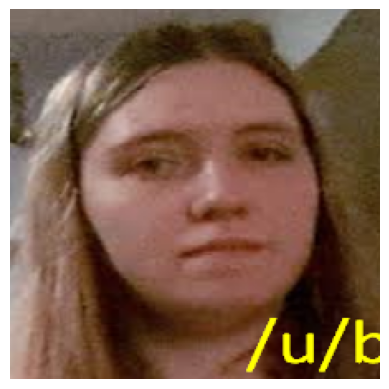

True BMI: 31.6142011834
Predicted BMI: [28.710072]


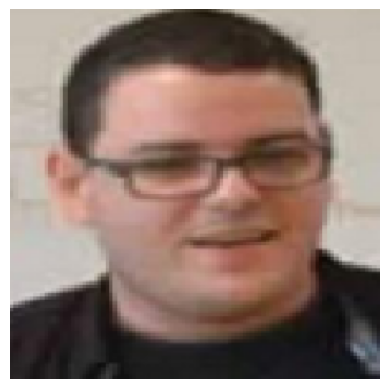

True BMI: 27.4951111111
Predicted BMI: [30.27756]


In [36]:
import matplotlib.pyplot as plt
import random

# Specify the number of images to display
num_images = 2

# Counter variable to keep track of the number of images displayed
num_displayed = 0

# Randomly select images from the test set
random_indices = random.sample(range(len(test_set[0][0])), num_images)

# Iterate over the randomly selected images
for index in random_indices:
    # Get the image and BMI at the selected index
    image = test_set[0][0][index]
    bmi = predictions[index]

    # Rescale the image from [0, 1] to [0, 255]
    image = image * 255

    # Display the image
    plt.imshow(image.astype('uint8'))
    plt.axis('off')
    plt.show()

    # Print the true BMI
    true_bmi = test_set[0][1][index]
    print("True BMI:", true_bmi)

    # Print the predicted BMI
    print("Predicted BMI:", bmi)

    # Increment the counter
    num_displayed += 1

    # Check if the desired number of images have been displayed
    if num_displayed == num_images:
        break

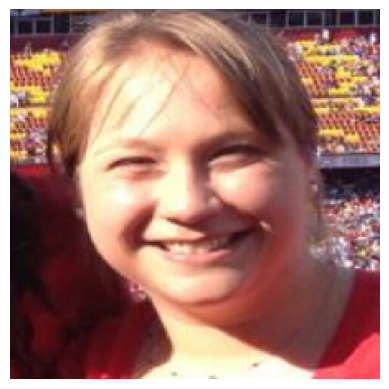

True BMI: 33.8304358781
Predicted BMI: [31.191986]


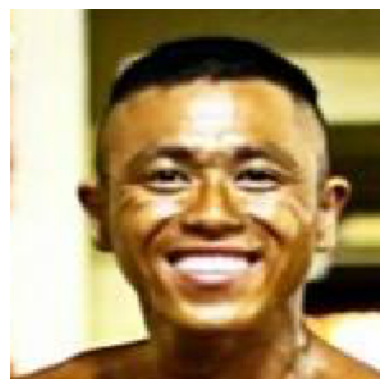

True BMI: 24.2079889807
Predicted BMI: [26.70509]


In [51]:
import matplotlib.pyplot as plt
import random

# Specify the number of images to display
num_images = 2

# Counter variable to keep track of the number of images displayed
num_displayed = 0

# Randomly select images from the test set
random_indices = random.sample(range(len(test_set[0][0])), num_images)

# Iterate over the randomly selected images
for index in random_indices:
    # Get the image and BMI at the selected index
    image = test_set[0][0][index]
    bmi = predictions[index]

    # Rescale the image from [0, 1] to [0, 255]
    image = image * 255

    # Display the image
    plt.imshow(image.astype('uint8'))
    plt.axis('off')
    plt.show()

    # Print the true BMI
    true_bmi = test_set[0][1][index]
    print("True BMI:", true_bmi)

    # Print the predicted BMI
    print("Predicted BMI:", bmi)

    # Increment the counter
    num_displayed += 1

    # Check if the desired number of images have been displayed
    if num_displayed == num_images:
        break

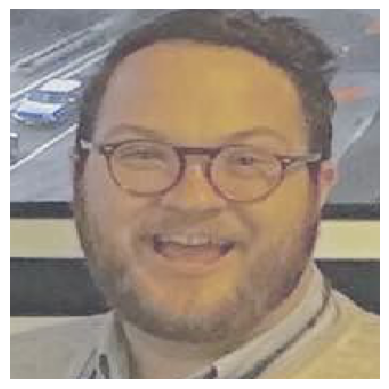

True BMI: 36.7281632653
Predicted BMI: [28.620853]


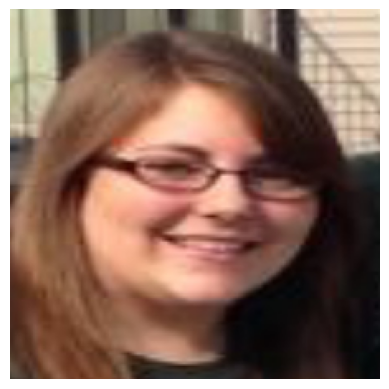

True BMI: 37.1027777778
Predicted BMI: [29.238823]


In [29]:
# Specify the number of images to display
num_images = 2

# Counter variable to keep track of the number of images displayed
num_displayed = 0

# Randomly select images from the test set
random_indices = random.sample(range(len(test_set[0][0])), num_images)

# Iterate over the randomly selected images
for index in random_indices:
    # Get the image and BMI at the selected index
    image = test_set[0][0][index]
    bmi = predictions[index]

    # Rescale the image from [0, 1] to [0, 255]
    image = image * 255

    # Display the image
    plt.imshow(image.astype('uint8'))
    plt.axis('off')
    plt.show()

    # Print the true BMI
    true_bmi = test_set[0][1][index]
    print("True BMI:", true_bmi)

    # Print the predicted BMI
    print("Predicted BMI:", bmi)

    # Increment the counter
    num_displayed += 1

    # Check if the desired number of images have been displayed
    if num_displayed == num_images:
        break

In [ ]:
%run Webcam_Image_Capture_v2.py